In [2]:
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/AOLMERobots.py
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/color_threshold_sliders_image.py
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/my_image.png
!wget https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/thresholds2.py


--2021-07-02 06:57:57--  https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/AOLMERobots.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1081 (1.1K) [text/plain]
Saving to: ‘AOLMERobots.py’

AOLMERobots.py      100%[===================>]   1.06K  --.-KB/s    in 0s      

2021-07-02 06:57:57 (45.6 MB/s) - ‘AOLMERobots.py’ saved [1081/1081]

--2021-07-02 06:57:57--  https://raw.githubusercontent.com/ivpcl/AOLME_Level2/main/ColorDetectionInterface/color_threshold_sliders_image.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting 

In [3]:
from google.colab.patches import cv2_imshow

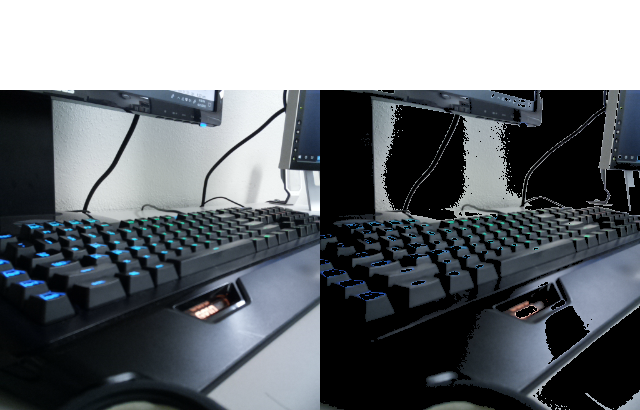

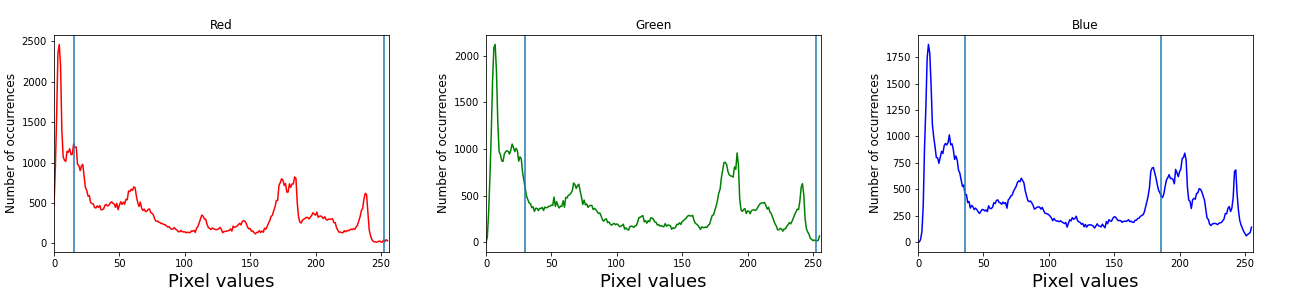

In [28]:
%matplotlib inline
from thresholds2 import *
import AOLMERobots as gopi
import cv2
import numpy as np
import matplotlib.pyplot


image = cv2.imread('my_image.png')
height, width = image.shape[:2]
image= cv2.resize(image, (int(320/width*height), 320))

thr_obj = threshold(image)
img = image.copy()
    
#@title Transformation Parameters { run: "auto" }

redLow = 15 #@param {type:"slider", min:0, max:255, step:1}
redHi  = 252 #@param {type:"slider", min:0, max:255, step:6}

greenLow = 30 #@param {type:"slider", min:0, max:255, step:6}
greenHi  = 252 #@param {type:"slider", min:0, max:255, step:6}

blueLow = 36 #@param {type:"slider", min:0, max:255, step:6}
blueHi  = 186 #@param {type:"slider", min:0, max:255, step:6}


rgb_values = [blueLow, blueHi, greenLow, greenHi, redLow, redHi]
    
# Red component processing:
thr_obj.sel_color_comp ('red')
RedLow   =  thr_obj.ThreshLow   (redLow)            
RedRange =  thr_obj.ThreshRange (redLow , redHi)   
RedHi    =  thr_obj.ThreshHigh  (redHi)
    
# Green component processing:
thr_obj.sel_color_comp ('green')
GreenLow   =  thr_obj.ThreshLow   (greenLow)            
GreenRange =  thr_obj.ThreshRange (greenLow , greenHi)  
GreenHi    =  thr_obj.ThreshHigh  (greenHi)
        
# Blue component processing:
thr_obj.sel_color_comp ('blue')
BlueLow   =  thr_obj.ThreshLow   (blueLow)            
BlueRange =  thr_obj.ThreshRange (blueLow , blueHi)   
BlueHi    =  thr_obj.ThreshHigh  (blueHi)             
   
# Generate the second window, including 9 single color images, one combination image, and text
white= np.zeros((90, RedLow.shape[1]), np.uint8)
white[:] = (255)
    
font = cv2.FONT_HERSHEY_SIMPLEX

# Get middle-RGB combination
comb_image, comb_allTh= thr_combination(img, BlueRange,GreenRange, RedRange).return_result()   

vcat1 = cv2.vconcat((cv2.merge((white, white, white)), image))
vcat2 = cv2.vconcat((cv2.merge((white, white, white)), comb_image))
all = np.hstack((vcat1, vcat2))

cv2_imshow(all)

# Show histograms for RGB color
gopi.show_RGB_hist(img, rgb_values)

